# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2022&rating_imdb=7


### **Description:**
JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**


**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:
```
**a. Movie Information:**
- Movie title
- Release year
- Genre
- IMDb rating
- Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
- URL to the movie page on JustWatch
```

**b. TV Show Information:**
```
- TV show title
- Release year
- Genre
- IMDb rating
- Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
- URL to the TV show page on JustWatch
```

**c. Scope:**
```
- Scrape data for at least 50 movies and 50 TV shows.
- You can choose the entry point to ensure a diverse dataset.
```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**
```
- Only include movies and TV shows released in the last 2 years (from the current date).
- Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

```
- Calculate the average IMDb rating for the scraped movies and TV shows.
- Identify the top 5 genre that have the highest number of available movies and TV shows.
- Determine the streaming service with the most significant number of offerings.
```   

**3. Data Export:**

```
- Dump the filtered and analysed data into a CSV file for further processing and reporting.
- Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.
- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.
- Your Code shouldn't have any errors and should be executable at a one go.
- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.

# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
import requests
import json
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time
import random
import csv

## **Scrapping Movies Data**

In [2]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

## **Fetching Movie URL's**

In [3]:
def main_fetch_urls():
    base_url = 'https://www.justwatch.com/in/movies?release_year_from=2022&rating_imdb=7'
    soup = fetch_movie_urls(base_url)

    if soup is None:
        print("Failed to retrieve the page")
        return

    # Extract movie links
    movie_links = soup.find_all('a', href=True, class_='title-list-grid__item--link')
    movie_links = movie_links[:50]  # Limit to the first 50 links

    movie_urls = ['https://www.justwatch.com' + link['href'] for link in movie_links]

    # Convert to DataFrame
    df = pd.DataFrame(movie_urls, columns=['URL'])
    df.to_csv('justwatch_movies.csv', index=False)
    print('Data has been saved to justwatch_movies.csv')

if __name__ == "__main__":
    main_fetch_urls()

Data has been saved to justwatch_movies.csv


## **Scrapping Movie Title**

In [4]:
def fetch_movie_title(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return 'Title not found'
    soup = BeautifulSoup(response.text, 'html.parser')

    # Check the first path
    title_tag = soup.find('h1', class_='title-detail-hero__details__title has-original-title')
    if title_tag:
        title = title_tag.contents[0].strip()
    else:
        # Check the second path if the first one is not found
        title_tag = soup.find('h1', class_='title-detail-hero__details__title')
        title = title_tag.contents[0].strip() if title_tag else 'Title not found'

    return title

def main_append_titles():
    # Read the CSV file with movie URLs
    df = pd.read_csv('justwatch_movies.csv')

    titles = []
    for url in df['URL']:
        title = fetch_movie_title(url)
        titles.append(title)

    # Add the titles to the DataFrame
    df['Title'] = titles

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_movies.csv', index=False)
    print('Data has been saved to justwatch_movies.csv')

if __name__ == "__main__":
    main_append_titles()


Data has been saved to justwatch_movies.csv


## **Scrapping release Year**

In [5]:
def fetch_release_year(url, retries=5):
    headers = [
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36'}
    ]

    for i in range(retries):
        try:
            headers_choice = random.choice(headers)
            response = requests.get(url, headers=headers_choice)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')

            # Check the first path
            title_tag = soup.find('h1', class_='title-detail-hero__details__title has-original-title')
            if title_tag:
                year_tag = title_tag.find('span', class_='release-year')
            else:
                # Check the second path if the first one is not found
                title_tag = soup.find('h1', class_='title-detail-hero__details__title')
                year_tag = title_tag.find('span', class_='release-year') if title_tag else None

            if year_tag:
                year = year_tag.get_text(strip=True).strip('()')
            else:
                year = 'Year not found'

            return year

        except requests.RequestException as e:
            if response.status_code == 429:  # Rate limit exceeded
                delay = 2 ** i + random.uniform(0, 1)  # Exponential backoff with jitter
                print(f"Rate limit exceeded, retrying in {delay:.1f} seconds...")
                time.sleep(delay)
            else:
                print(f"Request error for URL {url}: {e}")
                return 'Year not found'
        except Exception as e:
            print(f"Error processing URL {url}: {e}")
            return 'Year not found'

def main_append_years():
    # Read the CSV file with TV show URLs
    df = pd.read_csv('justwatch_movies.csv')

    years = []
    for url in df['URL']:
        year = fetch_release_year(url)
        years.append(year)
        time.sleep(random.uniform(1, 2))

    # Add the years to the DataFrame
    df['Release Year'] = years

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_movies.csv', index=False)
    print('Data has been saved to justwatch_movies.csv')

if __name__ == "__main__":
    main_append_years()


Data has been saved to justwatch_movies.csv


## **Scrapping genre**

In [7]:
def fetch_genre(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the h3 tag with genre information
    genre_header = soup.find('h3', string='genre')
    if genre_header:
        genre_value = genre_header.find_next_sibling('div').text.strip()
    else:
        genre_value = 'Not Available'

    return genre_value

def main():
    # Load URLs from CSV file
    df = pd.read_csv('justwatch_movies.csv')

    # Add a new column for genre
    df['Genre'] = ''

    # Fetch genre for each URL
    for i, row in df.iterrows():
        url = row['URL']
        genre = fetch_genre(url)
        df.at[i, 'Genre'] = genre

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_movies.csv', index=False)
    print('genre have been appended to justwatch_movies.csv')

# Run the script
if __name__ == "__main__":
    main()

genre have been appended to justwatch_movies.csv


## **Scrapping IMBD Rating**

In [8]:
def fetch_imdb_rating(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the IMDb rating
    imdb_rating = soup.find('img', alt='IMDB')
    if imdb_rating:
        rating_div = imdb_rating.find_next('div')
        imdb_rating_value = rating_div.text.strip() if rating_div else 'Not Available'

        # Remove any content within parentheses
        imdb_rating_value = re.sub(r'\(.*?\)', '', imdb_rating_value).strip()
    else:
        imdb_rating_value = 'Not Available'

    return imdb_rating_value

def main():
    # Load URLs from CSV file
    df = pd.read_csv('justwatch_movies.csv')

    # Add a new column for IMDb ratings
    df['IMDB Rating'] = ''

    # Fetch IMDb rating for each URL
    for i, row in df.iterrows():
        url = row['URL']
        imdb_rating = fetch_imdb_rating(url)
        df.at[i, 'IMDB Rating'] = imdb_rating

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_movies.csv', index=False)
    print('IMDb ratings have been appended to justwatch_movies.csv')

# Run the script
if __name__ == "__main__":
    main()


IMDb ratings have been appended to justwatch_movies.csv


## **Scrapping Runtime/Duration**

In [9]:
def fetch_runtime(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the runtime
    runtime = soup.find('h3', string='Runtime')
    if runtime:
        runtime_value = runtime.find_next('div').text.strip() if runtime.find_next('div') else 'Not Available'
    else:
        runtime_value = 'Not Available'

    return runtime_value

def main():
    # Load URLs from CSV file
    df = pd.read_csv('justwatch_movies.csv')

    # Add a new column for runtime
    df['Runtime'] = ''

    # Fetch runtime for each URL
    for i, row in df.iterrows():
        url = row['URL']
        runtime = fetch_runtime(url)
        df.at[i, 'Runtime'] = runtime

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_movies.csv', index=False)
    print('Runtime has been appended to justwatch_movies.csv')

# Run the script
if __name__ == "__main__":
    main()


Runtime has been appended to justwatch_movies.csv


## **Scrapping Age Rating**

In [10]:
def fetch_age_rating(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the age rating
    age_rating = soup.find('h3', string='Age rating')
    if age_rating:
        age_rating_value = age_rating.find_next('div').text.strip() if age_rating.find_next('div') else 'Not Available'
    else:
        age_rating_value = 'Not Available'

    return age_rating_value

def main():
    # Load URLs from CSV file
    df = pd.read_csv('justwatch_movies.csv')

    # Add a new column for age rating
    df['Age Rating'] = ''

    # Fetch age rating for each URL
    for i, row in df.iterrows():
        url = row['URL']
        age_rating = fetch_age_rating(url)
        df.at[i, 'Age Rating'] = age_rating

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_movies.csv', index=False)
    print('Age rating has been appended to justwatch_movies.csv')

# Run the script
if __name__ == "__main__":
    main()


Age rating has been appended to justwatch_movies.csv


## **Fetching Production Countries Details**

In [12]:
USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:92.0) Gecko/20100101 Firefox/92.0',
    # Add more User-Agent strings here
]

def fetch_production_country(url):
    try:
        headers = {'User-Agent': random.choice(USER_AGENTS)}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the <h3> element and check if it contains "Production country" in a case-insensitive way
        h3_elements = soup.find_all('h3', class_='detail-infos__subheading')
        production_country_div = None

        for h3 in h3_elements:
            if re.search('Production country', h3.get_text(), re.IGNORECASE):
                production_country_div = h3.find_next_sibling('div', class_='detail-infos__value')
                break

        if production_country_div:
            return production_country_div.get_text(strip=True)
        return None
    except Exception as e:
        print(f"Error fetching production country for URL {url}: {e}")
        return None

def main_append_production_countries():
    # Read the CSV file with movie URLs
    df = pd.read_csv('justwatch_movies.csv')

    # Initialize a list to store the production countries
    production_countries = []

    # Iterate over each URL and fetch the production country
    for url in df['URL']:
        production_country = fetch_production_country(url)
        production_countries.append(production_country)

        # Introduce a random delay between 1 and 2 seconds to avoid being blocked
        time.sleep(random.uniform(1, 2))

    # Add the production country column to the DataFrame
    df['Production Country'] = production_countries

    # Save the updated DataFrame back to CSV
    df.to_csv('justwatch_movies.csv', index=False)

    print("Production country data has been added to justwatch_movies.csv")

if __name__ == "__main__":
    main_append_production_countries()

Production country data has been added to justwatch_movies.csv


## **Fetching Streaming Service Details**

In [13]:
USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:92.0) Gecko/20100101 Firefox/92.0',
    # Add more User-Agent strings here
]

def fetch_streaming_platforms(url):
    try:
        headers = {'User-Agent': random.choice(USER_AGENTS)}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the <meta> tag with name="description"
        meta_tag = soup.find('meta', attrs={'name': 'description'})
        if meta_tag:
            content = meta_tag.get('content', '')
            # Extract platform names using regex
            platforms = re.findall(r'\b(?:Netflix|Prime Video|Apple TV Plus|Crunchyroll|Hotstar|Jio Cinema|Zee5|MUBI|Sony Liv|YouTube|GuideDoc|Netflix Kids|Yupp TV|Sun Nxt|Hungama Play|Alt Balaji|Curiosity Stream|ShemarooMe|DOCSVILLE|Tata Play|Discovery+|ManoramaMax|aha|WOW Presents Plus|Magellan TV|BroadwayHD|Lionsgate Play|Dekkoo|True Story)\b', content)
            return ', '.join(platforms) if platforms else None
        return None
    except Exception as e:
        print(f"Error fetching streaming platforms for URL {url}: {e}")
        return None

def main_append_streaming_platforms():
    # Read the CSV file with movie URLs
    df = pd.read_csv('justwatch_movies.csv')

    # Initialize a list to store the streaming platforms
    platforms_list = []

    # Iterate over each URL and fetch the streaming platforms
    for url in df['URL']:
        platforms = fetch_streaming_platforms(url)
        platforms_list.append(platforms)

        # Introduce a random delay between 1 and 5 seconds to avoid being blocked
        time.sleep(random.uniform(1, 2))

    # Add the platforms column to the DataFrame
    df['Platforms'] = platforms_list

    # Save the updated DataFrame back to CSV
    df.to_csv('justwatch_movies.csv', index=False)

    print("Streaming platforms data has been added to justwatch_movies.csv")

if __name__ == "__main__":
    main_append_streaming_platforms()


Streaming platforms data has been added to justwatch_movies.csv


## **Now Creating Movies DataFrame**

In [15]:
movies_data = pd.read_csv('justwatch_movies.csv')
movies_data.head(3)

,URL,Title,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Platforms
0,https://www.justwatch.com/in/movie/kill-2024,Kill,2024,Not Available,7.7,1h 45min,A,"United States, India","Netflix, Prime Video, Hotstar"
1,https://www.justwatch.com/in/movie/maharaja-2024,Maharaja,2024,Not Available,8.6,2h 30min,Not Available,India,"Netflix, Prime Video, Hotstar"
2,https://www.justwatch.com/in/movie/project-k,Kalki 2898-AD,2024,Not Available,7.6,3h 1min,UA,India,"Netflix, Prime Video"


## **Scraping TV  Show Data**

In [16]:
import requests
import json
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time
import random
import csv

In [17]:
def fetch_tv_shows_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

## **Fetching Tv shows Url details**

In [18]:
def main_fetch_urls():
    base_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2022&rating_imdb=7'
    soup = fetch_tv_shows_urls(base_url)

    if soup is None:
        print("Failed to retrieve the page")
        return

    # Extract TV show links
    tv_show_links = soup.find_all('a', href=True, class_='title-list-grid__item--link')
    tv_show_links = tv_show_links[:50]  # Limit to the first 50 links

    tv_show_urls = ['https://www.justwatch.com' + link['href'] for link in tv_show_links]

    # Convert to DataFrame
    df = pd.DataFrame(tv_show_urls, columns=['URL'])
    df.to_csv('justwatch_data(tv).csv', index=False)
    print('Data has been saved to justwatch_data(tv).csv')

if __name__ == "__main__":
    main_fetch_urls()


Data has been saved to justwatch_data(tv).csv


## **Fetching Tv Show Title details**

In [19]:
def fetch_movie_title(url, retries=5):
    headers_list = [
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36'}
    ]

    for i in range(retries):
        try:
            headers = random.choice(headers_list)
            response = requests.get(url, headers=headers)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')

            # Check the path with class ending in 'data-v-f0af2e1e'
            title_tag = soup.find('h1', class_=lambda x: x and x.endswith('data-v-f0af2e1e'))
            if title_tag:
                title = title_tag.contents[0].strip()
            else:
                # Check the path with 'has-original-title'
                title_tag = soup.find('h1', class_='title-detail-hero__details__title has-original-title')
                if title_tag:
                    title = title_tag.contents[0].strip()
                else:
                    # Check the default path
                    title_tag = soup.find('h1', class_='title-detail-hero__details__title')
                    title = title_tag.contents[0].strip() if title_tag else 'Title not found'

            return title

        except requests.RequestException as e:
            if response.status_code == 429:  # Rate limit exceeded
                delay = 2 ** i + random.uniform(0, 1)  # Exponential backoff with jitter
                print(f"Rate limit exceeded, retrying in {delay:.1f} seconds...")
                time.sleep(delay)
            else:
                print(f"Request error for URL {url}: {e}")
                return 'Title not found'
        except Exception as e:
            print(f"Error processing URL {url}: {e}")
            return 'Title not found'

def main_append_titles():
    # Read the CSV file with movie URLs
    df = pd.read_csv('justwatch_data(tv).csv')

    titles = []
    for url in df['URL']:
        title = fetch_movie_title(url)
        titles.append(title)

    # Add the titles to the DataFrame
    df['Title'] = titles

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_data(tv).csv', index=False)
    print('Data has been saved to justwatch_data(tv).csv')

if __name__ == "__main__":
    main_append_titles()


Rate limit exceeded, retrying in 2.0 seconds...
Rate limit exceeded, retrying in 2.0 seconds...
Rate limit exceeded, retrying in 1.4 seconds...
Rate limit exceeded, retrying in 2.0 seconds...
Rate limit exceeded, retrying in 1.8 seconds...
Rate limit exceeded, retrying in 1.8 seconds...
Rate limit exceeded, retrying in 2.9 seconds...
Rate limit exceeded, retrying in 1.9 seconds...
Rate limit exceeded, retrying in 1.2 seconds...
Rate limit exceeded, retrying in 2.2 seconds...
Rate limit exceeded, retrying in 4.9 seconds...
Rate limit exceeded, retrying in 1.5 seconds...
Rate limit exceeded, retrying in 2.4 seconds...
Rate limit exceeded, retrying in 1.8 seconds...
Rate limit exceeded, retrying in 2.8 seconds...
Rate limit exceeded, retrying in 1.0 seconds...
Rate limit exceeded, retrying in 1.7 seconds...
Rate limit exceeded, retrying in 2.6 seconds...
Rate limit exceeded, retrying in 1.4 seconds...
Rate limit exceeded, retrying in 2.8 seconds...
Rate limit exceeded, retrying in 1.2 sec

## **Fetching Release Year**

In [20]:
def fetch_release_year(url, retries=5):
    headers_list = [
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36'}
    ]

    for i in range(retries):
        try:
            headers = random.choice(headers_list)
            response = requests.get(url, headers=headers)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')

            # Check the first path
            title_tag = soup.find('h1', class_='title-detail-hero__details__title')
            if title_tag:
                year_tag = title_tag.find('span', class_='release-year')
            else:
                # Check the second path if the first one is not found
                title_tag = soup.find('h1', class_='title-detail-hero__details__title has-original-title', attrs={'data-v-f0af2e1e': True})
                year_tag = title_tag.find('span', class_='release-year') if title_tag else None

            year = year_tag.get_text(strip=True).strip('()') if year_tag else 'Year not found'
            return year

        except requests.RequestException as e:
            if response.status_code == 429:  # Rate limit exceeded
                delay = 2 ** i + random.uniform(0, 1)  # Exponential backoff with jitter
                print(f"Rate limit exceeded, retrying in {delay:.1f} seconds...")
                time.sleep(delay)
            else:
                print(f"Request error for URL {url}: {e}")
                return 'Year not found'
        except Exception as e:
            print(f"Error processing URL {url}: {e}")
            return 'Year not found'

def main_append_years():
    # Read the CSV file with movie URLs
    df = pd.read_csv('justwatch_data(tv).csv')

    years = []
    for url in df['URL']:
        year = fetch_release_year(url)
        years.append(year)

    # Add the years to the DataFrame
    df['Release Year'] = years

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_data(tv).csv', index=False)
    print('Data has been saved to justwatch_data(tv).csv')

if __name__ == "__main__":
    main_append_years()


Rate limit exceeded, retrying in 1.7 seconds...
Rate limit exceeded, retrying in 1.3 seconds...
Rate limit exceeded, retrying in 1.6 seconds...
Rate limit exceeded, retrying in 1.1 seconds...
Rate limit exceeded, retrying in 2.4 seconds...
Rate limit exceeded, retrying in 1.9 seconds...
Rate limit exceeded, retrying in 2.0 seconds...
Rate limit exceeded, retrying in 1.7 seconds...
Rate limit exceeded, retrying in 2.7 seconds...
Rate limit exceeded, retrying in 1.8 seconds...
Rate limit exceeded, retrying in 1.6 seconds...
Rate limit exceeded, retrying in 2.0 seconds...
Rate limit exceeded, retrying in 1.4 seconds...
Rate limit exceeded, retrying in 2.9 seconds...
Rate limit exceeded, retrying in 1.8 seconds...
Rate limit exceeded, retrying in 1.2 seconds...
Rate limit exceeded, retrying in 2.9 seconds...
Rate limit exceeded, retrying in 1.9 seconds...
Rate limit exceeded, retrying in 1.7 seconds...
Rate limit exceeded, retrying in 1.7 seconds...
Rate limit exceeded, retrying in 2.8 sec

## **Fetching TV Show Genre Details**

In [21]:
def fetch_genre(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the h3 tag with genre information
    genre_header = soup.find('h3', text='genre')
    if genre_header:
        genre_value = genre_header.find_next_sibling('div').text.strip()
    else:
        genre_value = 'Not Available'

    return genre_value

def main():
    # Load URLs from CSV file
    df = pd.read_csv('justwatch_data(tv).csv')

    # Add a new column for genre
    df['Genre'] = ''

    # Fetch genre for each URL
    for i, row in df.iterrows():
        url = row['URL']
        genre = fetch_genre(url)
        df.at[i, 'Genre'] = genre

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_data(tv).csv', index=False)
    print('genre have been appended to justwatch_data(tv).csv')

# Run the script
if __name__ == "__main__":
    main()


<ipython-input-21-0317ba00e211>:9: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  genre_header = soup.find('h3', text='genre')


genre have been appended to justwatch_data(tv).csv


## **Fetching IMDB Rating Details**

In [22]:
def fetch_imdb_rating(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Check the old path for IMDb rating
    imdb_rating = soup.find('img', alt='IMDB')
    if imdb_rating:
        rating_div = imdb_rating.find_next('div')
        imdb_rating_value = rating_div.text.strip() if rating_div else 'Not Available'
    else:
        # Check the new path for IMDb rating
        imdb_rating_div = soup.find('div', class_='title-detail-hero-details__item')
        if imdb_rating_div:
            imdb_score_span = imdb_rating_div.find('span', class_='imdb-score')
            imdb_rating_value = imdb_score_span.text.strip() if imdb_score_span else 'Not Available'
        else:
            imdb_rating_value = 'Not Available'

    # Extract the numeric rating value and remove content within parentheses
    imdb_rating_value = re.sub(r'\s*\(.*?\)', '', imdb_rating_value).strip()

    return imdb_rating_value

def main():
    # Load URLs from CSV file
    df = pd.read_csv('justwatch_data(tv).csv')

    # Add a new column for IMDb ratings
    df['IMDB Rating'] = ''

    # Fetch IMDb rating for each URL
    for i, row in df.iterrows():
        url = row['URL']
        imdb_rating = fetch_imdb_rating(url)
        df.at[i, 'IMDB Rating'] = imdb_rating

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_data(tv).csv', index=False)
    print('IMDb ratings have been appended to justwatch_data(tv).csv')

# Run the script
if __name__ == "__main__":
    main()


IMDb ratings have been appended to justwatch_data(tv).csv


## **Fetching Age Rating Details**

In [23]:
def fetch_age_rating(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the age rating
    age_rating = soup.find('h3', string='Age rating')
    if age_rating:
        age_rating_value = age_rating.find_next('div').text.strip() if age_rating.find_next('div') else 'Not Available'
    else:
        # Check alternative path if needed
        age_rating_value = soup.find('span', class_='age-rating').text.strip() if soup.find('span', class_='age-rating') else 'Not Available'

    return age_rating_value

def main():
    # Load URLs from CSV file
    df = pd.read_csv('justwatch_data(tv).csv')

    # Add a new column for age rating
    df['Age Rating'] = ''

    # Fetch age rating for each URL
    for i, row in df.iterrows():
        url = row['URL']
        age_rating = fetch_age_rating(url)
        df.at[i, 'Age Rating'] = age_rating

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_data(tv).csv', index=False)
    print('Age rating has been appended to justwatch_data(tv).csv')

# Run the script
if __name__ == "__main__":
    main()


Age rating has been appended to justwatch_data(tv).csv


## **Fetching Production Country details**

In [24]:
USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:92.0) Gecko/20100101 Firefox/92.0',
    # Add more User-Agent strings here
]

def fetch_production_country(url, retries=5):
    for i in range(retries):
        try:
            headers = {'User-Agent': random.choice(USER_AGENTS)}
            response = requests.get(url, headers=headers)
            response.raise_for_status()  # Raise HTTPError for bad responses

            # Check for HTTP 429 Rate Limit Exceeded
            if response.status_code == 429:
                delay = 2 ** i + random.uniform(0, 1)  # Exponential backoff with jitter
                print(f"Rate limit exceeded for URL {url}, retrying in {delay:.1f} seconds...")
                time.sleep(delay)
                continue

            soup = BeautifulSoup(response.text, 'html.parser')

            # Find the <h3> with text "Production country" and the associated <div>
            h3_element = soup.find('h3', class_='detail-infos__subheading', text=re.compile('Production country', re.IGNORECASE))
            if h3_element:
                production_country_div = h3_element.find_next_sibling('div', class_='detail-infos__value')
                if production_country_div:
                    return production_country_div.get_text(strip=True)
            return 'Production country not found'
        except requests.RequestException as e:
            if response.status_code == 429:  # Rate limit exceeded
                delay = 2 ** i + random.uniform(0, 1)  # Exponential backoff with jitter
                print(f"Rate limit exceeded for URL {url}, retrying in {delay:.1f} seconds...")
                time.sleep(delay)
            else:
                print(f"Request error for URL {url}: {e}")
                return 'Production country not found'
        except Exception as e:
            print(f"Error processing URL {url}: {e}")
            return 'Production country not found'

def main_append_production_countries():
    # Read the CSV file with movie URLs
    df = pd.read_csv('justwatch_data(tv).csv')

    # Initialize a list to store the production countries
    production_countries = []

    # Iterate over each URL and fetch the production country
    for url in df['URL']:
        production_country = fetch_production_country(url)
        production_countries.append(production_country)

    # Add the production country column to the DataFrame
    df['Production Country'] = production_countries

    # Save the updated DataFrame back to CSV
    df.to_csv('justwatch_data(tv).csv', index=False)

    print("Production country data has been added to justwatch_data(tv).csv")

if __name__ == "__main__":
    main_append_production_countries()


<ipython-input-24-98d0b479aa6c>:25: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  h3_element = soup.find('h3', class_='detail-infos__subheading', text=re.compile('Production country', re.IGNORECASE))


Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/shogun-2024, retrying in 1.6 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/tribhuvan-mishra-ca-topper, retrying in 1.6 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/tribhuvan-mishra-ca-topper, retrying in 2.1 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/gyaarah-gyaarah, retrying in 2.0 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/presumed-innocent, retrying in 1.0 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/farzi, retrying in 1.6 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/farzi, retrying in 3.0 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/raising-voices, retrying in 1.6 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/fallout, retrying in 1.3 seconds...
Rate limit exceeded for URL 

## **Fetching Streaming Service details**

In [25]:
USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:92.0) Gecko/20100101 Firefox/92.0',
    # Add more User-Agent strings here
]

def fetch_streaming_platforms(url, retries=5):
    for i in range(retries):
        try:
            headers = {'User-Agent': random.choice(USER_AGENTS)}
            response = requests.get(url, headers=headers)
            response.raise_for_status()  # Raise HTTPError for bad responses

            # Check for HTTP 429 Rate Limit Exceeded
            if response.status_code == 429:
                delay = 2 ** i + random.uniform(0, 1)  # Exponential backoff with jitter
                print(f"Rate limit exceeded for URL {url}, retrying in {delay:.1f} seconds...")
                time.sleep(delay)
                continue

            soup = BeautifulSoup(response.text, 'html.parser')

            # Find the <meta> tag with name="description"
            meta_tag = soup.find('meta', attrs={'name': 'description'})
            if meta_tag:
                content = meta_tag.get('content', '')
                # Extract platform names using regex
                platforms = re.findall(r'\b(?:Netflix|Prime Video|Apple TV Plus|Crunchyroll|Hotstar|Jio Cinema|Zee5|MUBI|Sony Liv|YouTube|GuideDoc|Netflix Kids|Yupp TV|Sun Nxt|Hungama Play|Alt Balaji|Curiosity Stream|ShemarooMe|DOCSVILLE|Tata Play|Discovery+|ManoramaMax|aha|WOW Presents Plus|Magellan TV|BroadwayHD|Lionsgate Play|Dekkoo|True Story)\b', content)
                return ', '.join(platforms) if platforms else 'Platforms not found'
            return 'Platforms not found'
        except requests.RequestException as e:
            if response.status_code == 429:  # Rate limit exceeded
                delay = 2 ** i + random.uniform(0, 1)  # Exponential backoff with jitter
                print(f"Rate limit exceeded for URL {url}, retrying in {delay:.1f} seconds...")
                time.sleep(delay)
            else:
                print(f"Request error for URL {url}: {e}")
                return 'Platforms not found'
        except Exception as e:
            print(f"Error processing URL {url}: {e}")
            return 'Platforms not found'

def main_append_streaming_platforms():
    # Read the CSV file with movie URLs
    df = pd.read_csv('justwatch_data(tv).csv')

    # Initialize a list to store the streaming platforms
    platforms_list = []

    # Iterate over each URL and fetch the streaming platforms
    for url in df['URL']:
        platforms = fetch_streaming_platforms(url)
        platforms_list.append(platforms)

    # Add the platforms column to the DataFrame
    df['Platforms'] = platforms_list

    # Save the updated DataFrame back to CSV
    df.to_csv('justwatch_data(tv).csv', index=False)

    print("Streaming platforms data has been added to justwatch_data(tv).csv")

if __name__ == "__main__":
    main_append_streaming_platforms()


Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/house-of-the-dragon, retrying in 1.0 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/house-of-the-dragon, retrying in 2.2 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/presumed-innocent, retrying in 1.6 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/the-bear, retrying in 1.5 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/3-body-problem, retrying in 1.2 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/3-body-problem, retrying in 2.0 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/jamnapaar, retrying in 1.9 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/dark-matter-2024, retrying in 1.4 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/dark-winds, retrying in 1.1 seconds...
Rate limit exceeded for URL 

## **Fetching Duration Details**

In [26]:
USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:92.0) Gecko/20100101 Firefox/92.0',
    # Add more User-Agent strings here
]

def fetch_duration(url, retries=5):
    for i in range(retries):
        try:
            headers = {'User-Agent': random.choice(USER_AGENTS)}
            response = requests.get(url, headers=headers)
            response.raise_for_status()  # Raise HTTPError for bad responses

            # Check for HTTP 429 Rate Limit Exceeded
            if response.status_code == 429:
                delay = 2 ** i + random.uniform(0, 1)  # Exponential backoff with jitter
                print(f"Rate limit exceeded for URL {url}, retrying in {delay:.1f} seconds...")
                time.sleep(delay)
                continue

            soup = BeautifulSoup(response.text, 'html.parser')

            # Find the <h3> with text "Runtime" and the associated <div>
            h3_element = soup.find('h3', class_='detail-infos__subheading', text='Runtime')
            if h3_element:
                duration_div = h3_element.find_next_sibling('div', class_='detail-infos__value')
                if duration_div:
                    return duration_div.get_text(strip=True)
            return 'Duration not found'
        except requests.RequestException as e:
            if response.status_code == 429:  # Rate limit exceeded
                delay = 2 ** i + random.uniform(0, 1)  # Exponential backoff with jitter
                print(f"Rate limit exceeded for URL {url}, retrying in {delay:.1f} seconds...")
                time.sleep(delay)
            else:
                print(f"Request error for URL {url}: {e}")
                return 'Duration not found'
        except Exception as e:
            print(f"Error processing URL {url}: {e}")
            return 'Duration not found'

def main_append_durations():
    # Read the CSV file with TV show URLs
    df = pd.read_csv('justwatch_data(tv).csv')

    # Initialize a list to store the durations
    durations_list = []

    # Iterate over each URL and fetch the duration
    for url in df['URL']:
        duration = fetch_duration(url)
        durations_list.append(duration)

    # Add the durations column to the DataFrame
    df['Duration (Episode)'] = durations_list

    # Save the updated DataFrame back to CSV
    df.to_csv('justwatch_data(tv).csv', index=False)

    print("Duration data has been added to justwatch_data(tv).csv")

if __name__ == "__main__":
    main_append_durations()


Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/house-of-the-dragon, retrying in 1.6 seconds...


<ipython-input-26-d1437b0af23f>:25: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  h3_element = soup.find('h3', class_='detail-infos__subheading', text='Runtime')


Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/shogun-2024, retrying in 2.0 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/shogun-2024, retrying in 2.5 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/tribhuvan-mishra-ca-topper, retrying in 1.4 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/tribhuvan-mishra-ca-topper, retrying in 2.9 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/presumed-innocent, retrying in 1.6 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/batman-caped-crusader, retrying in 2.0 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/raising-voices, retrying in 1.0 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/raising-voices, retrying in 2.5 seconds...
Rate limit exceeded for URL https://www.justwatch.com/in/tv-show/3-body-problem, retrying in 1.6 seconds...


## **Creating TV Show DataFrame**

In [27]:
x = pd.read_csv('justwatch_data(tv).csv')
x.head(50)

,URL,Title,Release Year,Genre,IMDB Rating,Age Rating,Production Country,Platforms,Duration (Episode)
0,https://www.justwatch.com/in/tv-show/house-of-...,House of the Dragon,2022,Not Available,Not Available,A,United States,"Netflix, Prime Video",1h 0min
1,https://www.justwatch.com/in/tv-show/shogun-2024,Shōgun,2024,Not Available,Not Available,Not Available,United States,"Netflix, Hotstar, Prime Video",59min
2,https://www.justwatch.com/in/tv-show/tribhuvan...,Tribhuvan Mishra CA Topper,2024,Not Available,Not Available,Not Available,India,"Netflix, Prime Video",57min
3,https://www.justwatch.com/in/tv-show/gyaarah-g...,Gyaarah Gyaarah,2024,Not Available,Not Available,A,India,"Netflix, Prime Video",43min
4,https://www.justwatch.com/in/tv-show/presumed-...,Presumed Innocent,2024,Not Available,7.7,Not Available,United States,"Netflix, Prime Video",43min
5,https://www.justwatch.com/in/tv-show/batman-ca...,Batman: Caped Crusader,2024,Not Available,Not Available,Not Available,United States,"Netflix, Prime Video",25min
6,https://www.justwatch.com/in/tv-show/the-bear,The Bear,2022,Not Available,Not Available,Not Available,United States,"Netflix, Prime Video, Hotstar",34min
7,https://www.justwatch.com/in/tv-show/farzi,Farzi,2023,Not Available,8.4,Not Available,India,"Netflix, Hotstar",56min
8,https://www.justwatch.com/in/tv-show/raising-v...,Raising Voices,2024,Not Available,Not Available,Not Available,Spain,"Netflix, Hotstar, Prime Video",46min
9,https://www.justwatch.com/in/tv-show/fallout,Fallout,2024,Not Available,Not Available,Not Available,United States,"Netflix, Hotstar, Prime Video",59min


## **Task 2 :- Data Filtering & Analysis**

In [28]:
# Already set the filter from website

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [29]:
import pandas as pd

def calculate_mean_imdb_rating(file_path, category):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Ensure the 'IMDB Rating' column exists
    if 'IMDB Rating' in df.columns:
        # Clean the 'IMDB Rating' column
        df['IMDB Rating'] = pd.to_numeric(df['IMDB Rating'], errors='coerce')

        # Calculate the mean IMDb rating
        mean_rating = df['IMDB Rating'].mean()

        print(f"The mean IMDb rating for {category} is: {mean_rating:.2f}")
    else:
        print(f"IMDB Rating column not found in {category} dataset.")

def main():
    # File paths
    movies_file_path = 'justwatch_movies.csv'
    tv_shows_file_path = 'justwatch_data(tv).csv'

    # Calculate mean IMDb ratings
    calculate_mean_imdb_rating(movies_file_path, 'movies')
    calculate_mean_imdb_rating(tv_shows_file_path, 'TV shows')

if __name__ == "__main__":
    main()


The mean IMDb rating for movies is: 7.78
The mean IMDb rating for TV shows is: 7.88


## **Analyzing Top genre and Vitualize it:**

In [30]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def analyze_top_genre(file_path, category):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Ensure the 'Genre' column exists
    if 'Genre' in df.columns:
        # Split genre and flatten the list
        genre = df['Genre'].dropna().str.split(',').explode()

        # Count the occurrences of each genre
        genre_counts = Counter(genre)

        # Get the top 10 genre counts
        top_genre_counts = dict(genre_counts.most_common(10))

        print(f"Top genres for {category}:")
        for genre, count in top_genre_counts.items():
            print(f"{genre.strip()}: {count}")
        print("\n")

        return top_genre_counts
    else:
        print(f"Genre column not found in the dataset: {file_path}")
        return {}

Top genres for movies:
Not Available: 50


Top genres for TV shows:
Not Available: 50




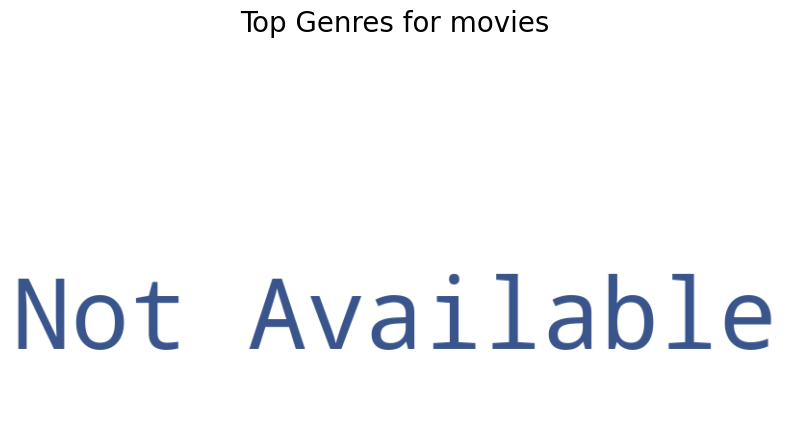

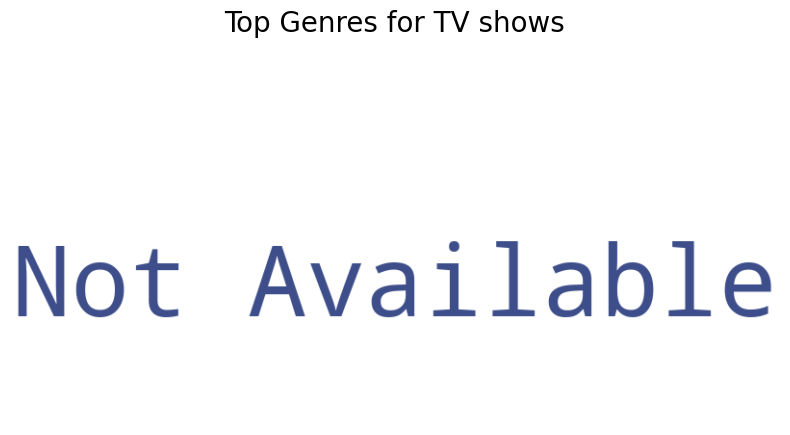

In [31]:
def generate_word_cloud(genre_counts, category):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Top Genres for {category}", fontsize=20)
    plt.axis('off')
    plt.show()

def main_with_visualization():
    # File paths
    movies_file_path = 'justwatch_movies.csv'
    tv_shows_file_path = 'justwatch_data(tv).csv'

    # Analyze top genres
    movie_genre_counts = analyze_top_genre(movies_file_path, 'movies')
    tv_genre_counts = analyze_top_genre(tv_shows_file_path, 'TV shows')

    # Generate and display word clouds
    if movie_genre_counts:
        generate_word_cloud(movie_genre_counts, 'movies')
    if tv_genre_counts:
        generate_word_cloud(tv_genre_counts, 'TV shows')

if __name__ == "__main__":
    main_with_visualization()


## **Finding Predominant Streaming Service**

In [32]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def analyze_top_platforms(file_path, category):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Ensure the 'Platforms' column exists
    if 'Platforms' in df.columns:
        # Split platforms and flatten the list
        platforms = df['Platforms'].dropna().str.split(',').explode()

        # Count the occurrences of each platform
        platform_counts = Counter(platforms)

        # Get the top platforms
        top_platform_counts = dict(platform_counts.most_common(10))

        print(f"Top platforms for {category}:")
        for platform, count in top_platform_counts.items():
            print(f"{platform.strip()}: {count}")
        print("\n")

        return top_platform_counts
    else:
        print(f"Platforms column not found in the dataset: {file_path}")
        return {}



In [ ]:
def generate_word_cloud(counts, category):
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(counts)

    # Display the word cloud
    plt.figure(figsize=(4, 2))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Top Platforms for {category}", fontsize=20)
    plt.axis('off')
    plt.show()

def main_with_visualization():
    # File paths
    movies_file_path = 'justwatch_movies.csv'
    tv_shows_file_path = 'justwatch_data(tv).csv'

    # Analyze top platforms
    movie_platform_counts = analyze_top_platforms(movies_file_path, 'movies')
    tv_platform_counts = analyze_top_platforms(tv_shows_file_path, 'TV shows')

    # Generate and display word clouds
    if movie_platform_counts:
        generate_word_cloud(movie_platform_counts, 'movies')
    if tv_platform_counts:
        generate_word_cloud(tv_platform_counts, 'TV shows')

if __name__ == "__main__":
    main_with_visualization()


## **Task 3 :- Data Export**

In [34]:
# File paths
movies_file_path = 'justwatch_movies.csv'
tv_shows_file_path = 'justwatch_data(tv).csv'

print(f"CSV files have been exported to {movies_file_path} and {tv_shows_file_path}")

CSV files have been exported to justwatch_movies.csv and justwatch_data(tv).csv
